# Retail Data Set
	Context
The Challenge - One challenge of modelling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.
Content
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.
Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales
Stores
Anonymized information about the 45 stores, indicating the type and size of store





Features
Contains additional data related to the store, department, and regional activity for the given dates.
•	Store - the store number
•	Date - the week
•	Temperature - average temperature in the region
•	Fuel Price - cost of fuel in the region
•	MarkDown1-5 - anonymized data related to promotional markdowns. Markdown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
•	CPI - the consumer price index
•	Unemployment - the unemployment rate
•	Is Holiday - whether the week is a special holiday week
Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
•	Store - the store number
•	Dept - the department number
•	Date - the week
•	Weekly Sales- sales for the given department in the given store
•	Is Holiday - whether the week is a special holiday week



The Task
1.	Predict the department-wide sales for each store for the following year
2.	Model the effects of markdowns on holiday weeks
3.	Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [2]:
features=pd.read_csv("Features data set.csv")
train=pd.read_csv("sales data-set.csv")
stores=pd.read_csv("stores data-set.csv")
test=pd.read_csv("test.csv")

# data observation

In [3]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [4]:
features.tail(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [5]:
features.shape

(8190, 12)

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 679.9+ KB


In [7]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
#There are missing values in Markdown, CPI and Unemployment variables.

In [9]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [11]:
train.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 11.7+ MB


In [13]:
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [14]:
test.tail(3)

,Store,Dept,Date,IsHoliday
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [15]:
test.shape

(115064, 4)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.3+ MB


In [17]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [18]:
stores.tail(3)

,Store,Type,Size
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [19]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 964.0+ bytes


In [20]:
stores.shape

(45, 3)

# data manipulation

In [21]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [22]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


# Lets merge the data

In [23]:
df = pd.merge(train, features, how = "left")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [24]:
df = pd.merge(df, stores, how = "left")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [25]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [26]:
df.Date = pd.to_datetime(df.Date)

In [27]:
df.set_index(keys= 'Date',inplace=True)

In [28]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-12-02,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
2010-05-03,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [29]:
df.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

In [30]:
df.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

# droping the MarkDown

In [31]:
df.drop(columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"],axis=1, inplace = True)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-05-02,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
2010-12-02,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
2010-05-03,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [32]:
df.Store = pd.Categorical(df.Store)
df.Dept = pd.Categorical(df.Dept)

In [33]:
df.dtypes

Store           category
Dept            category
Weekly_Sales     float64
IsHoliday           bool
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
Type              object
Size               int64
dtype: object

In [34]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


# data visualization

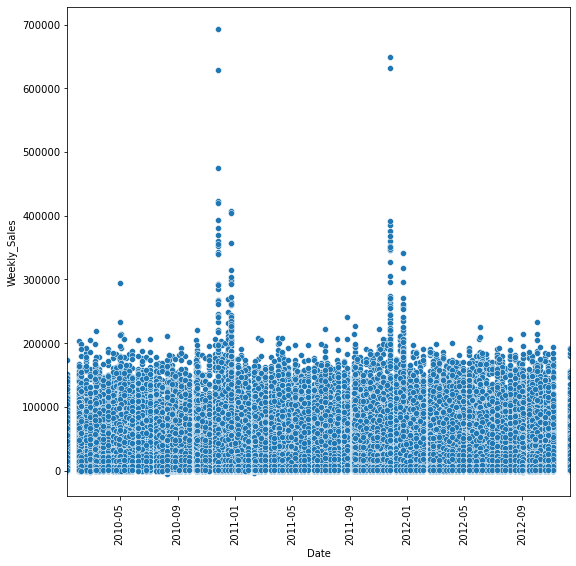

In [35]:
plt.figure(figsize=(9,9))

ax = sns.scatterplot(x = df.index , y ="Weekly_Sales", data = df)
ax.set_xlim(df.index.min(), df.index.max())
for item in ax.get_xticklabels():
    item.set_rotation(90);

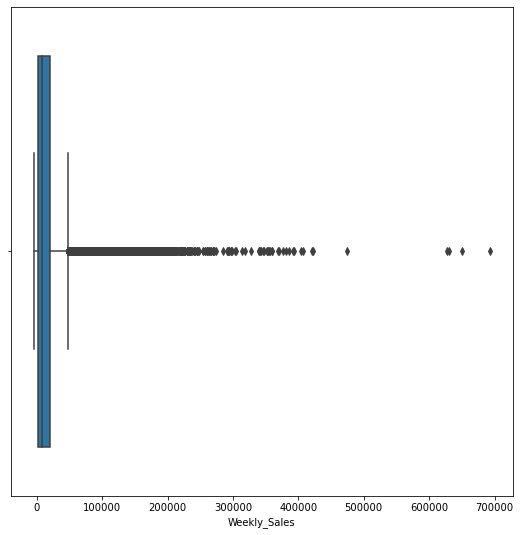

In [36]:
plt.figure(figsize=(9,9))
sns.boxplot(x = "Weekly_Sales", data = df);


# Single Variable Analysis

## 1.Store

In [37]:
df['Store'][:10]

Date
2010-05-02    1
2010-12-02    1
2010-02-19    1
2010-02-26    1
2010-05-03    1
2010-12-03    1
2010-03-19    1
2010-03-26    1
2010-02-04    1
2010-09-04    1
Name: Store, dtype: category
Categories (45, int64): [1, 2, 3, 4, ..., 42, 43, 44, 45]

In [38]:
df['Store'].value_counts(ascending=False)

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


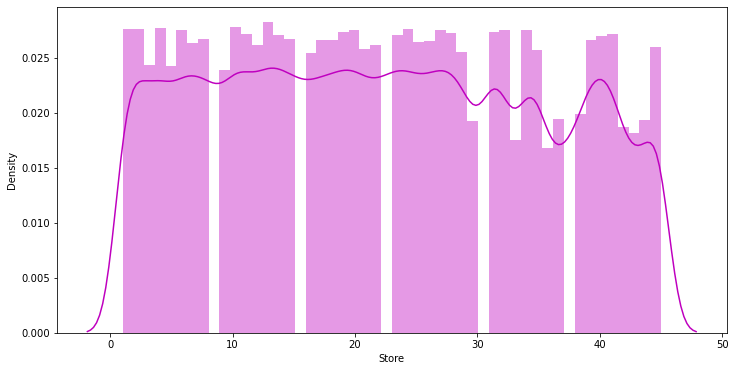

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(df['Store'],color='m')
plt.show()
plt.style.use("seaborn-white")

In [40]:
def scatter(df,column):
    plt.figure(figsize=(15,7))
    plt.scatter(df[column],df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)
    plt.style.use("seaborn-white")

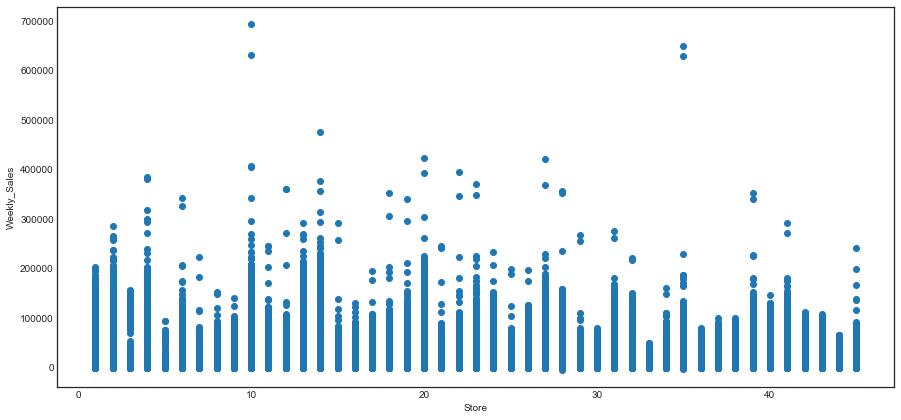

In [41]:
scatter(df,'Store')
plt.style.use("seaborn-ticks")

## 2.Dept

In [42]:
df['Dept'].value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


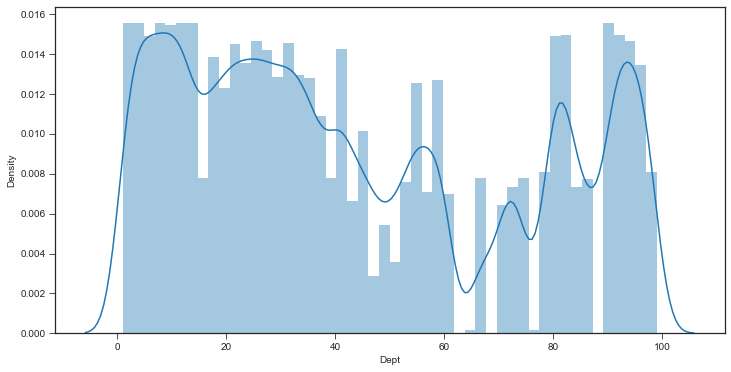

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(df['Dept'])
plt.show()
plt.style.use("seaborn-notebook")

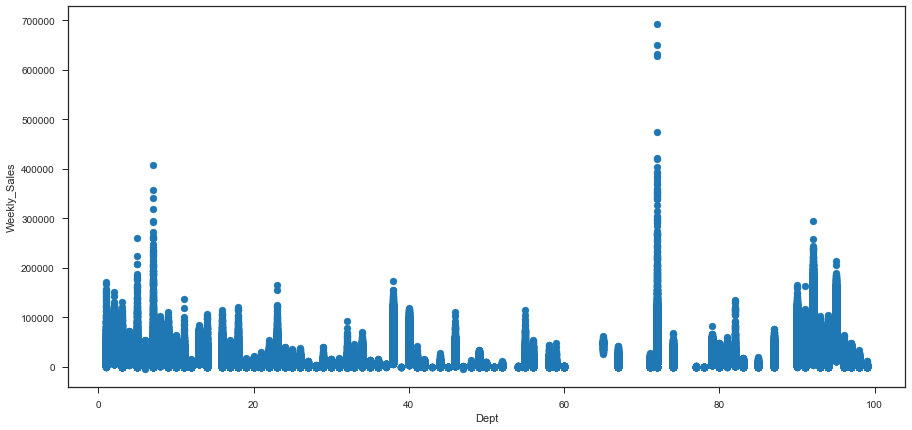

In [44]:
scatter(df,'Dept')
plt.style.use("seaborn-ticks")

## 3.Weekly_Sales

In [45]:
df['Weekly_Sales'].value_counts()

10.00       353
5.00        289
20.00       232
15.00       215
12.00       175
           ... 
6835.41       1
10467.96      1
31889.20      1
6748.45       1
14543.76      1
Name: Weekly_Sales, Length: 359464, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


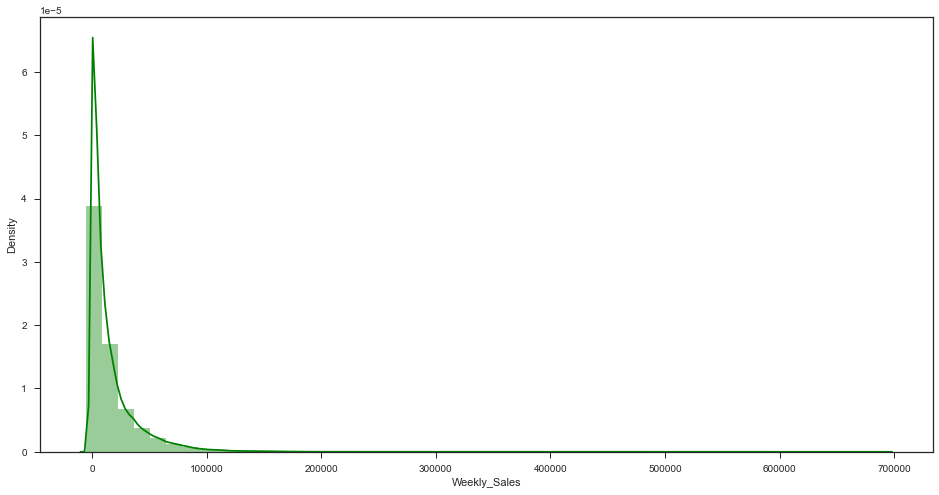

In [46]:
plt.figure(figsize=(16,8))
sns.distplot(df['Weekly_Sales'],color='g')
plt.show()
plt.style.use("seaborn-darkgrid")

## 4.IsHoliday

In [47]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [48]:
df['IsHoliday'].value_counts(normalize=True)

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


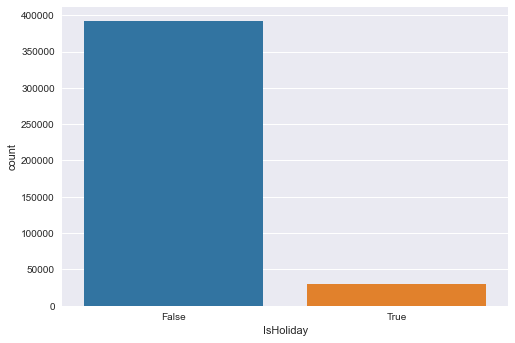

In [49]:
sns.countplot(df['IsHoliday'])
plt.show()

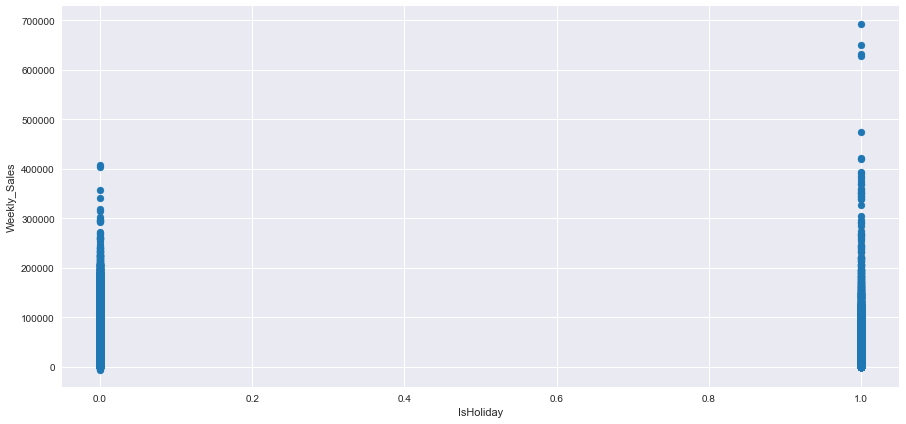

In [50]:
scatter(df,'IsHoliday')
plt.style.use("seaborn-darkgrid")

## 5.Temperature

In [51]:
df['Temperature'][:10]

Date
2010-05-02    42.31
2010-12-02    38.51
2010-02-19    39.93
2010-02-26    46.63
2010-05-03    46.50
2010-12-03    57.79
2010-03-19    54.58
2010-03-26    51.45
2010-02-04    62.27
2010-09-04    65.86
Name: Temperature, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


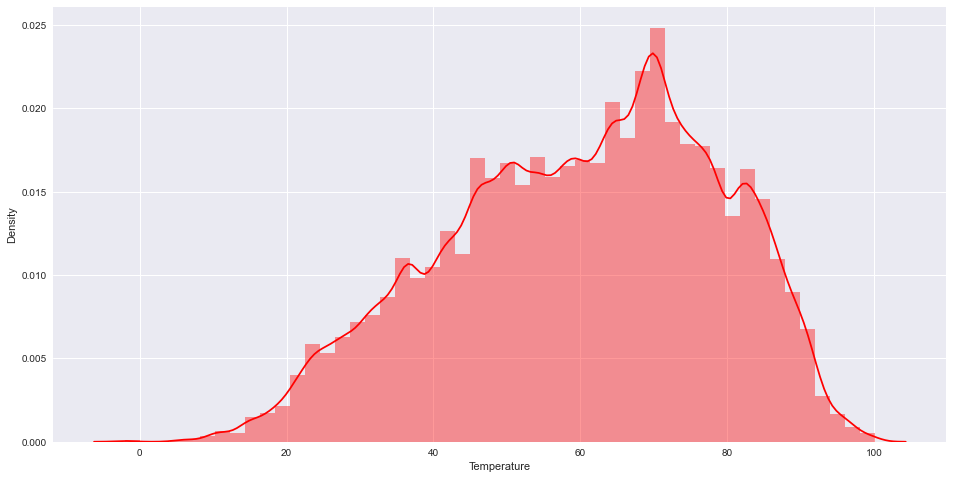

In [52]:
plt.figure(figsize=(16,8))
sns.distplot(df['Temperature'],color='r')
plt.show()
plt.style.use("seaborn-darkgrid")

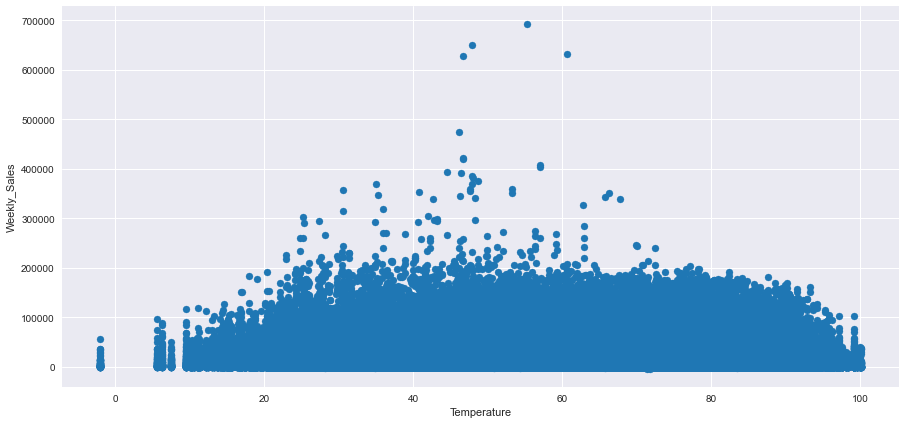

In [53]:
scatter(df,'Temperature')
plt.style.use("seaborn-notebook")

## 6.Fuel_Price

In [54]:
df['Fuel_Price'][:10]

Date
2010-05-02    2.572
2010-12-02    2.548
2010-02-19    2.514
2010-02-26    2.561
2010-05-03    2.625
2010-12-03    2.667
2010-03-19    2.720
2010-03-26    2.732
2010-02-04    2.719
2010-09-04    2.770
Name: Fuel_Price, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


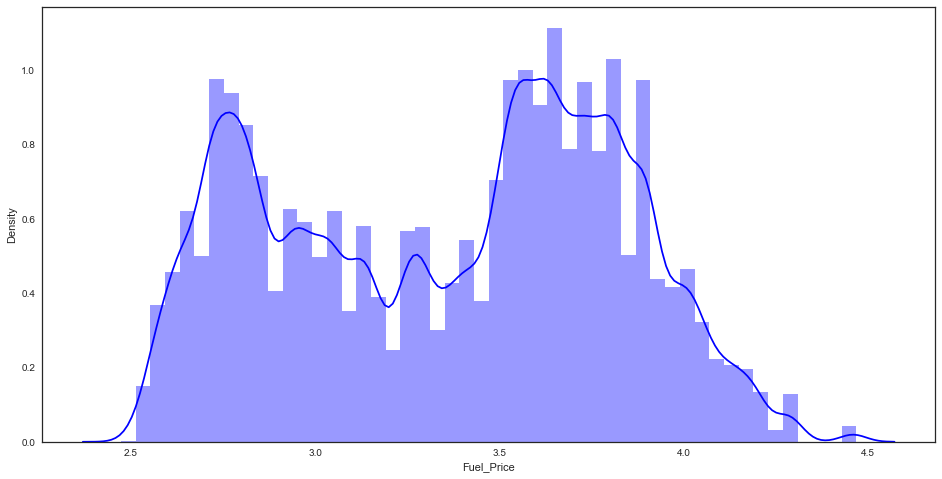

In [55]:
plt.figure(figsize=(16,8))
sns.distplot(df['Fuel_Price'],color='b')
plt.show()

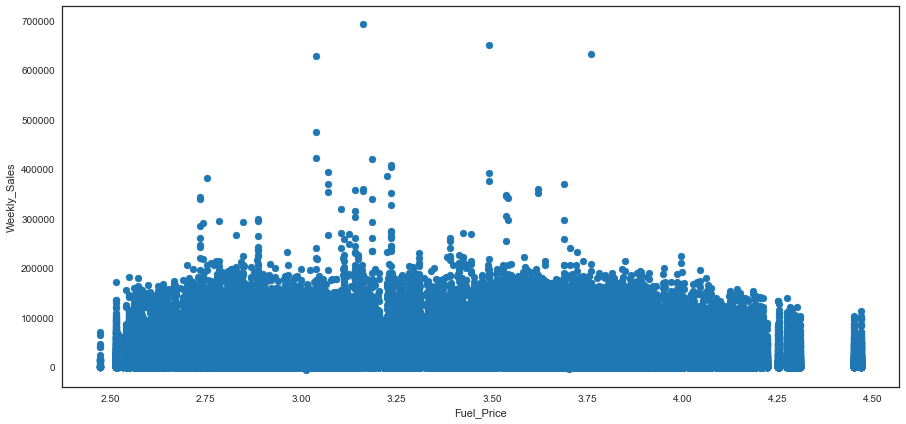

In [56]:
scatter(df,'Fuel_Price')
plt.style.use("seaborn-notebook")

## 7.CPI- the consumer price index

In [57]:
df['CPI'][:10]

Date
2010-05-02    211.096358
2010-12-02    211.242170
2010-02-19    211.289143
2010-02-26    211.319643
2010-05-03    211.350143
2010-12-03    211.380643
2010-03-19    211.215635
2010-03-26    211.018042
2010-02-04    210.820450
2010-09-04    210.622857
Name: CPI, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


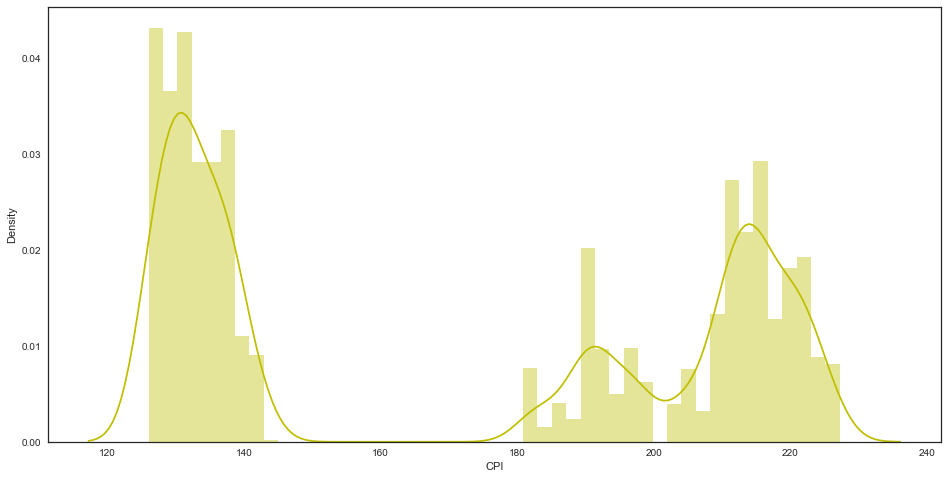

In [58]:
plt.figure(figsize=(16,8))
sns.distplot(df['CPI'],color='y')
plt.show()
plt.style.use("classic")

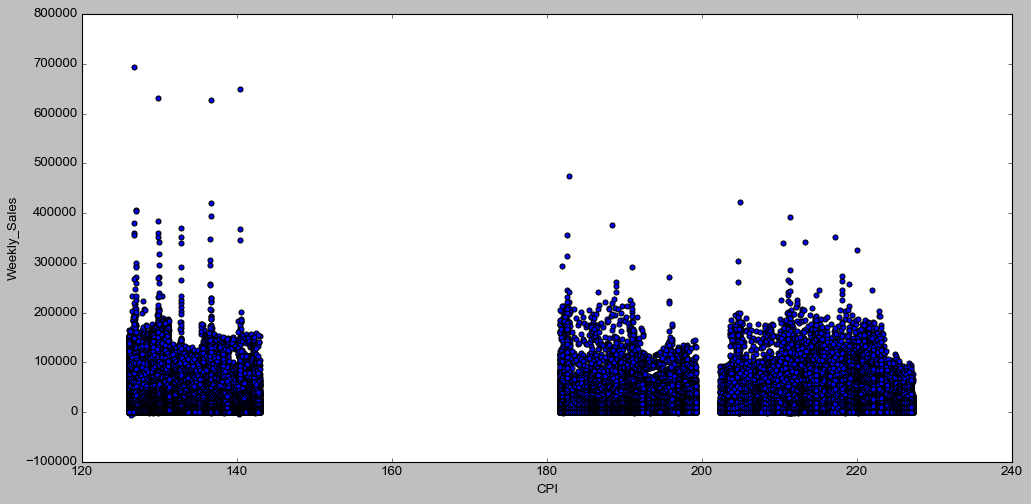

In [59]:
scatter(df,'CPI')

## 8.Unemployment

In [60]:
df['Unemployment'][:10]

Date
2010-05-02    8.106
2010-12-02    8.106
2010-02-19    8.106
2010-02-26    8.106
2010-05-03    8.106
2010-12-03    8.106
2010-03-19    8.106
2010-03-26    8.106
2010-02-04    7.808
2010-09-04    7.808
Name: Unemployment, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


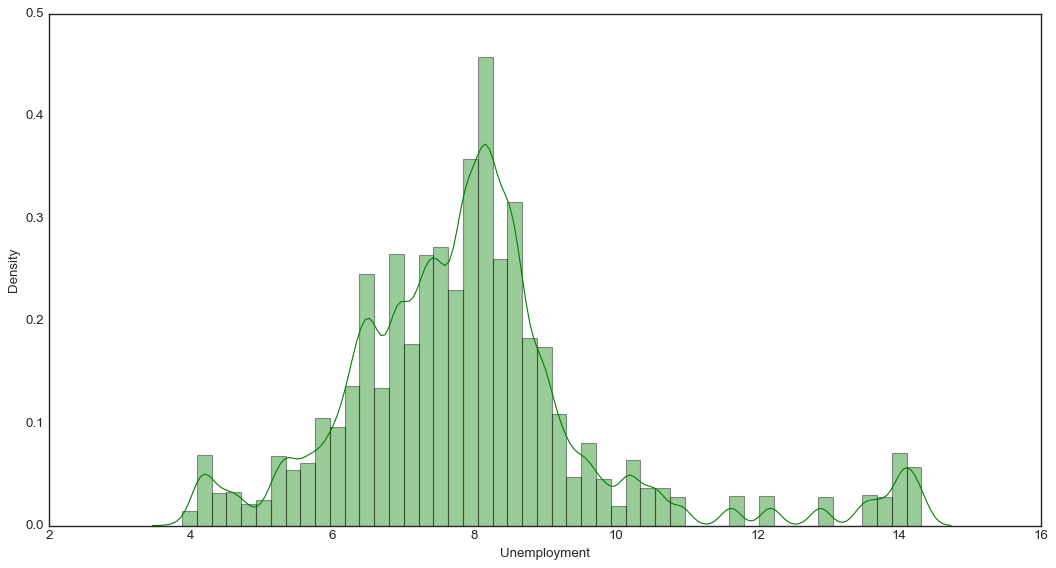

In [61]:
plt.figure(figsize=(16,8))
sns.distplot(df['Unemployment'],color='g')
plt.show()

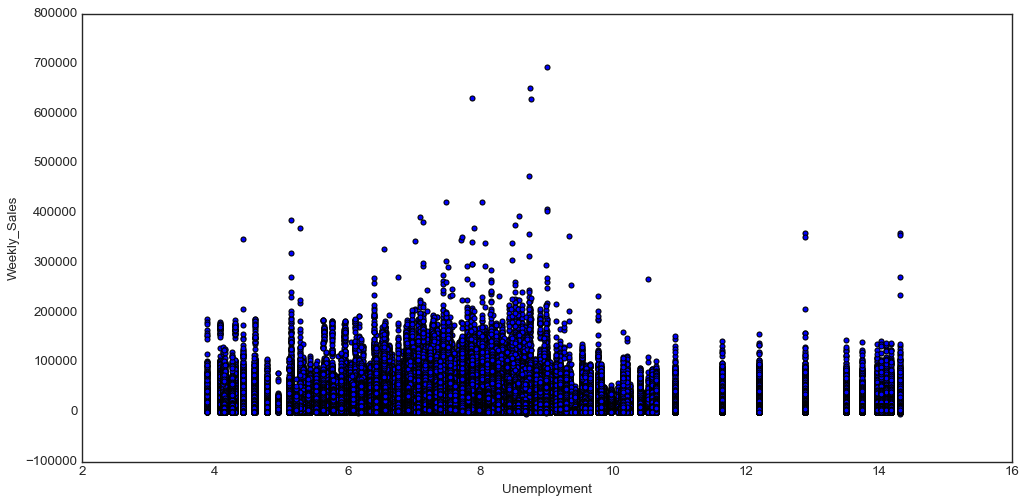

In [62]:
scatter(df,'Unemployment')

## 9.Type

In [63]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [64]:
df['Type'].value_counts(normalize=True)

A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


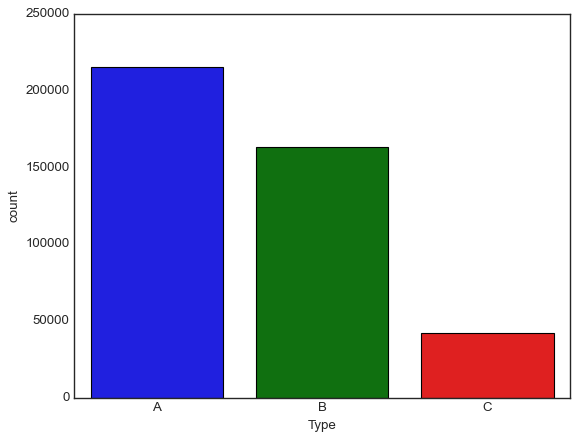

In [65]:
sns.countplot(df['Type'])
plt.show()
plt.style.use("seaborn-white")

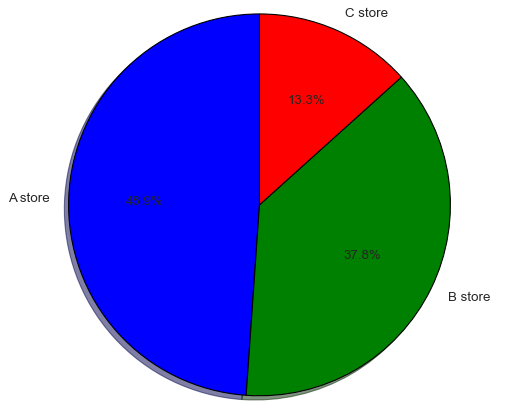

In [66]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

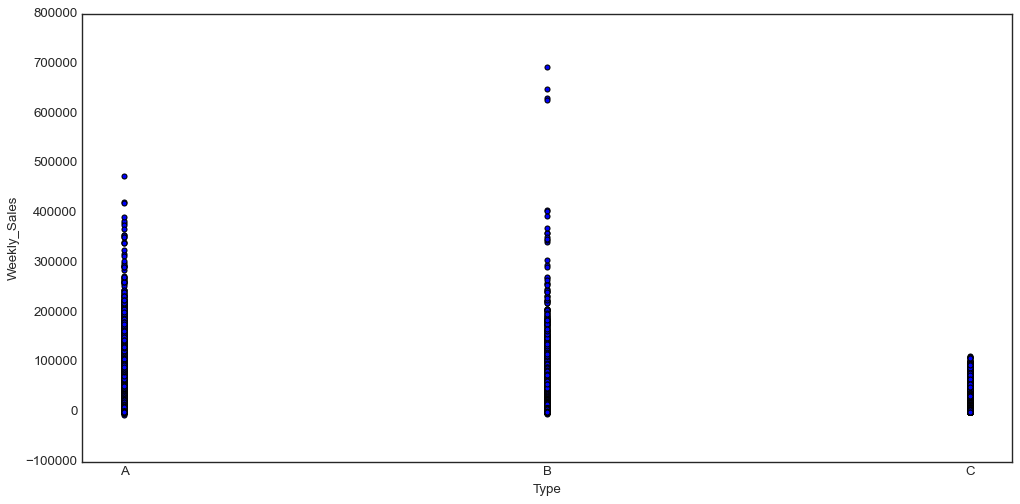

In [67]:
scatter(df,'Type')
plt.style.use("seaborn-deep")

## 10.Size

In [68]:
df['Size'][:10]

Date
2010-05-02    151315
2010-12-02    151315
2010-02-19    151315
2010-02-26    151315
2010-05-03    151315
2010-12-03    151315
2010-03-19    151315
2010-03-26    151315
2010-02-04    151315
2010-09-04    151315
Name: Size, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


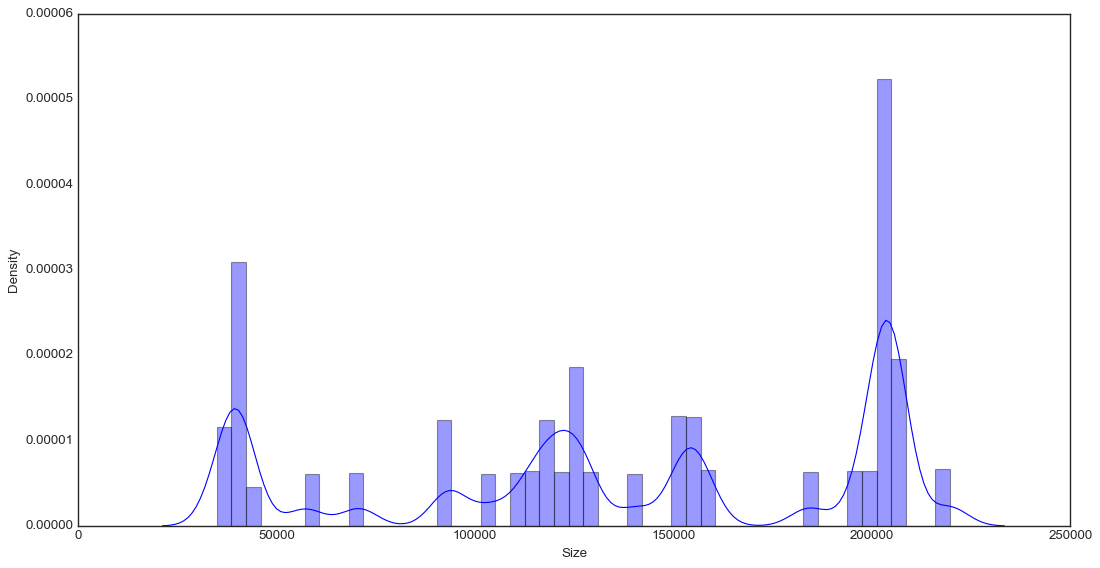

In [69]:
plt.figure(figsize=(16,8))
sns.distplot(df['Size'],color='b')
plt.show()
plt.style.use("seaborn-muted")

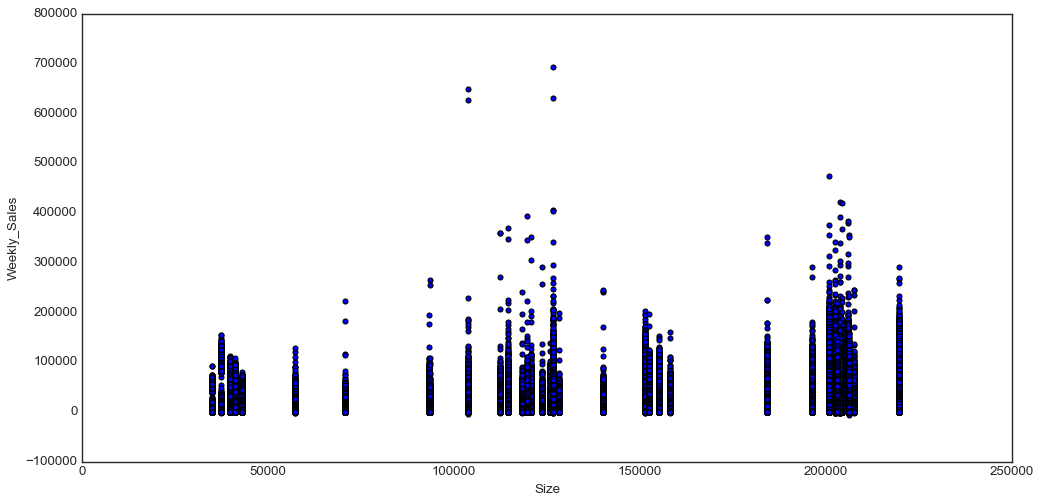

In [70]:
scatter(df,'Size')

In [71]:
df.Weekly_Sales[df.Weekly_Sales == max(df.Weekly_Sales)]

Date
2010-11-26    693099.36
Name: Weekly_Sales, dtype: float64

In [72]:
top5_sales = list(df.Weekly_Sales.sort_values(ascending=False).head(5).values)
top5_sales

[693099.36, 649770.18, 630999.19, 627962.93, 474330.1]

In [73]:
df.loc[df.Weekly_Sales.isin(top5_sales)].sort_values(by = "Weekly_Sales", ascending = False)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-11-26,10,72,693099.36,True,55.33,3.162,126.669267,9.003,B,126512
2011-11-25,35,72,649770.18,True,47.88,3.492,140.421786,8.745,B,103681
2011-11-25,10,72,630999.19,True,60.68,3.760,129.836400,7.874,B,126512
2010-11-26,35,72,627962.93,True,46.67,3.039,136.689571,8.763,B,103681
2010-11-26,14,72,474330.10,True,46.15,3.039,182.783277,8.724,A,200898


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


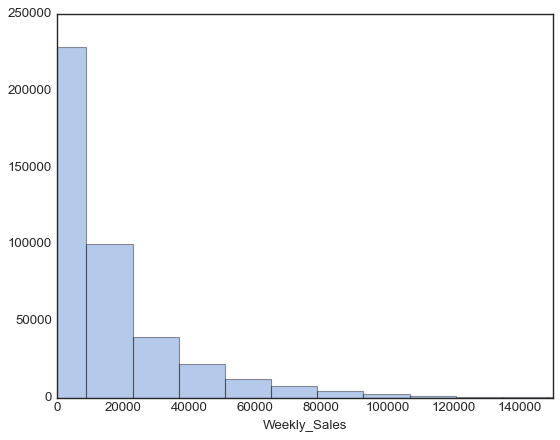

In [74]:
plt.xlim(0, 150000)
rcParams['figure.figsize'] = 1,6.0
sns.distplot(df.Weekly_Sales, kde = False);

# Correlation

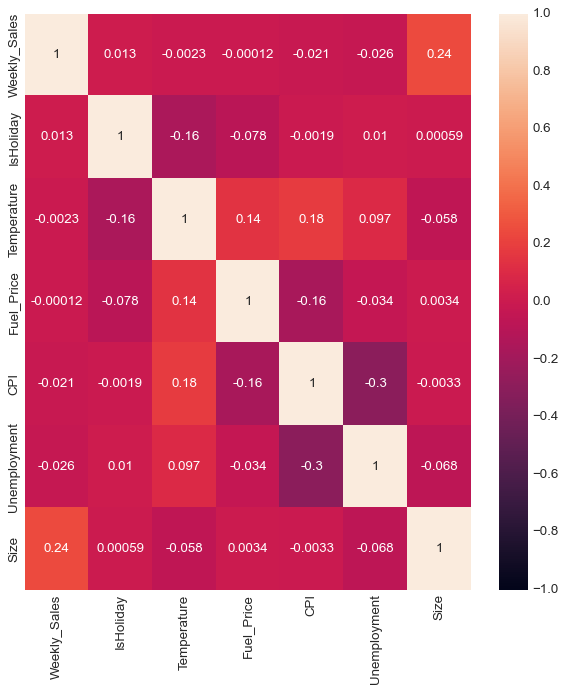

In [75]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);


In [76]:
df.dtypes

Store           category
Dept            category
Weekly_Sales     float64
IsHoliday           bool
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
Type              object
Size               int64
dtype: object

In [77]:
df.IsHoliday = pd.Categorical(df.IsHoliday)
df.Type = pd.Categorical(df.Type)

In [78]:
df.dtypes

Store           category
Dept            category
Weekly_Sales     float64
IsHoliday       category
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
Type            category
Size               int64
dtype: object

# Modelling

#### model preparation

In [79]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-05-02,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
2010-12-02,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
2010-05-03,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,118221
2012-05-10,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,118221
2012-12-10,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,118221


In [80]:
df_X = df.drop("Weekly_Sales", axis = 1)
df_X


,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2010-05-02,1,1,False,42.31,2.572,211.096358,8.106,A,151315
2010-12-02,1,1,True,38.51,2.548,211.242170,8.106,A,151315
2010-02-19,1,1,False,39.93,2.514,211.289143,8.106,A,151315
2010-02-26,1,1,False,46.63,2.561,211.319643,8.106,A,151315
2010-05-03,1,1,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,False,64.88,3.997,192.013558,8.684,B,118221
2012-05-10,45,98,False,64.89,3.985,192.170412,8.667,B,118221
2012-12-10,45,98,False,54.47,4.000,192.327265,8.667,B,118221


In [81]:
df_Y = df.Weekly_Sales
df_Y

Date
2010-05-02    24924.50
2010-12-02    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-05-03    21827.90
                ...   
2012-09-28      508.37
2012-05-10      628.10
2012-12-10     1061.02
2012-10-19      760.01
2012-10-26     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [82]:
df_X = pd.get_dummies(df_X, drop_first = True)

In [83]:
df_X.reset_index(inplace = True)

In [84]:
df_X = df_X.iloc[:,1:]
df_X

,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_2,Store_3,Store_4,Store_5,Store_6,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,IsHoliday_True,Type_B,Type_C
0,42.31,2.572,211.096358,8.106,151315,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,151315,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,39.93,2.514,211.289143,8.106,151315,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,151315,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,151315,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,64.88,3.997,192.013558,8.684,118221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
421566,64.89,3.985,192.170412,8.667,118221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
421567,54.47,4.000,192.327265,8.667,118221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
421568,56.47,3.969,192.330854,8.667,118221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [85]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_validation, df_Y_train, df_Y_validation = train_test_split(df_X , df_Y, test_size = 0.2)

In [86]:
df_X_train.head()

,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_2,Store_3,Store_4,Store_5,Store_6,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,IsHoliday_True,Type_B,Type_C
412132,38.65,3.433,184.387991,8.549,118221,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
127867,64.80,3.842,131.126667,5.965,219622,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
267327,64.47,4.003,128.823806,13.736,206302,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251680,50.72,3.758,136.367000,7.767,152513,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36046,78.83,2.671,126.076645,7.372,205863,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
    df_X_validation

,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_2,Store_3,Store_4,Store_5,Store_6,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,IsHoliday_True,Type_B,Type_C
257008,49.60,4.021,141.554780,8.009,204184,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154363,43.26,3.760,199.053937,5.847,57197,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
386460,33.40,2.684,189.737207,7.541,196321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108809,53.53,3.223,127.440484,14.021,112238,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16900,74.83,2.826,210.276844,8.200,202307,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190459,33.20,3.274,206.642409,7.343,203742,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104024,67.81,2.808,213.772689,7.343,207499,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276138,70.44,3.827,129.693800,12.890,206302,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308054,65.04,3.538,194.877972,8.622,203007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1.Linear Regression

In [88]:
    lm = LinearRegression()

In [89]:
model = lm.fit(df_X_train, df_Y_train)

In [90]:
lm.score(df_X_validation, df_Y_validation)

0.66078849949355

In [91]:
lm.score(df_X_train, df_Y_train)

0.656250898232454

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [93]:
cross_val_score(model, df_X_train, df_Y_train, cv = 10, scoring = "r2").mean()

0.6560768976835749

In [94]:
np.sqrt(-cross_val_score(model, 
                df_X_train, 
                df_Y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

13323.271742765006

In [95]:
y_pred = lm.predict(df_X_validation)

In [96]:
y_pred

array([53909.53415489, -9654.52708626,  6360.08010292, ...,
       79132.63179398,  3237.32191658,   937.77398109])

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
mse = mean_squared_error(df_Y_validation, y_pred)
mse

174385901.79234582

In [99]:
rmse = np.sqrt(mse)
rmse

13205.525426591166

In [100]:
df_Y.values.mean()

15981.25812346704

# 2.Decision



In [101]:
dtr = tree.DecisionTreeRegressor()

In [102]:
model = dtr.fit(df_X_train, df_Y_train)

In [103]:
dtr.score(df_X_validation, df_Y_validation)

0.9027623881770677

In [104]:
cross_val_score(model, df_X_train, df_Y_train, cv = 10, scoring = "r2").mean()

0.8919408733868913

In [105]:
        y_pred = dtr.predict(df_X_validation)

In [106]:
mse = mean_squared_error(df_Y_validation, y_pred)
mse

49989073.485300906

In [107]:
rmse = np.sqrt(mse)
rmse

7070.295148386728

Logistic Regression, Decision Tree models are applied. Best rmse value observed in Decision Tree model (49989073.). R2 is 90%. Therefore, final prediction will be done with  Decision Tree model.



# prediction

In [108]:
features=pd.read_csv("Features.csv")
stores=pd.read_csv("stores.csv")
test=pd.read_csv("test.csv")

In [109]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [110]:
features.shape

(8190, 12)

In [111]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [112]:
stores.shape

(45, 3)

In [113]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [114]:
test.shape

(115064, 4)

In [115]:
df_test = pd.merge(test, features, how = "inner")
df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [116]:
df_test = pd.merge(df_test, stores, how = "inner")
df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


Markdown variables were not in the model, so they are also dropped in "test" table.



In [118]:
df_test.drop(axis = 1, columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], inplace = True)
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315


In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   CPI           76902 non-null   float64
 7   Unemployment  76902 non-null   float64
 8   Type          115064 non-null  object 
 9   Size          115064 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 8.0+ MB


In [120]:
df_test.Date = pd.to_datetime(df_test.Date)
df_test.set_index(keys = "Date", inplace = True)
df_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315


In [121]:
df_test.IsHoliday = pd.Categorical(df_test.IsHoliday)
df_test.Store = pd.Categorical(df_test.Store)
df_test.Dept = pd.Categorical(df_test.Dept)
df_test.Type = pd.Categorical(df_test.Type)


In [122]:
df_test.dtypes

Store           category
Dept            category
IsHoliday       category
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
Type            category
Size               int64
dtype: object

In [123]:
df_test.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Size
count,115064.000000,115064.000000,76902.000000,76902.000000,115064.000000
mean,53.941804,3.581546,176.961347,6.868733,136497.688921
std,18.724153,0.239442,41.239967,1.583427,61106.926438
min,-7.290000,2.872000,131.236226,3.684000,34875.000000
25%,39.820000,3.431000,138.402033,5.771000,93638.000000
50%,54.470000,3.606000,192.304445,6.806000,140167.000000
75%,67.350000,3.766000,223.244532,8.036000,202505.000000
max,101.950000,4.125000,228.976456,10.199000,219622.000000


In [124]:
df_test.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [125]:
38162+38162 

76324

In [126]:
(115064-76324)/115064

0.3366821942571091

Missing value rate of CPI and Unemployment variables are too much. Since they are included in the model, the missing observations are deleted.

In [127]:
df_test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...
2013-07-26,45,93,False,76.06,3.804,NaN,NaN,B,118221
2013-07-26,45,94,False,76.06,3.804,NaN,NaN,B,118221
2013-07-26,45,95,False,76.06,3.804,NaN,NaN,B,118221


In [128]:
df_test.dropna(inplace=True)

In [129]:
df_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315


In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76902 entries, 2012-11-02 to 2013-04-26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         76902 non-null  category
 1   Dept          76902 non-null  category
 2   IsHoliday     76902 non-null  category
 3   Temperature   76902 non-null  float64 
 4   Fuel_Price    76902 non-null  float64 
 5   CPI           76902 non-null  float64 
 6   Unemployment  76902 non-null  float64 
 7   Type          76902 non-null  category
 8   Size          76902 non-null  int64   
dtypes: category(4), float64(4), int64(1)
memory usage: 3.8 MB


In [131]:
dftest_X=df_test

In [132]:
dftest_X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315


In [133]:
dftest_X.reset_index(inplace=True)

In [134]:
dftest_X.head()

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
1,2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2,2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
3,2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
4,2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315


In [135]:
dftest_X=dftest_X.iloc[:,1:]

In [136]:
dftest_X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,False,55.32,3.386,223.462779,6.573,A,151315
1,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2,1,3,False,55.32,3.386,223.462779,6.573,A,151315
3,1,4,False,55.32,3.386,223.462779,6.573,A,151315
4,1,5,False,55.32,3.386,223.462779,6.573,A,151315


In [137]:
dftest_X=pd.get_dummies(dftest_X,drop_first=True)

In [138]:
predictions= dtr.predict(dftest_X)

In [139]:
predictions.dtype

dtype('float64')

In [140]:
predictions=pd.Series(predictions)

In [141]:
predictions.describe()

count     76902.000000
mean      16361.985454
std       24208.865237
min        -771.900000
25%        2131.370000
50%        7678.530000
75%       20149.320000
max      649770.180000
dtype: float64

In [142]:
df_test

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315
1,2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315
2,2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315
3,2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315
4,2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...
76897,2013-04-26,45,93,False,50.64,3.615,193.589304,8.335,B,118221
76898,2013-04-26,45,94,False,50.64,3.615,193.589304,8.335,B,118221
76899,2013-04-26,45,95,False,50.64,3.615,193.589304,8.335,B,118221
76900,2013-04-26,45,97,False,50.64,3.615,193.589304,8.335,B,118221


In [143]:
df_test["Prediction_Sales"] = predictions


In [144]:
df_test

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Prediction_Sales
0,2012-11-02,1,1,False,55.32,3.386,223.462779,6.573,A,151315,21280.40
1,2012-11-02,1,2,False,55.32,3.386,223.462779,6.573,A,151315,43134.88
2,2012-11-02,1,3,False,55.32,3.386,223.462779,6.573,A,151315,11535.44
3,2012-11-02,1,4,False,55.32,3.386,223.462779,6.573,A,151315,35549.19
4,2012-11-02,1,5,False,55.32,3.386,223.462779,6.573,A,151315,19449.26
...,...,...,...,...,...,...,...,...,...,...,...
76897,2013-04-26,45,93,False,50.64,3.615,193.589304,8.335,B,118221,1897.44
76898,2013-04-26,45,94,False,50.64,3.615,193.589304,8.335,B,118221,5203.31
76899,2013-04-26,45,95,False,50.64,3.615,193.589304,8.335,B,118221,48434.97
76900,2013-04-26,45,97,False,50.64,3.615,193.589304,8.335,B,118221,7356.56


In [145]:
df_test.describe()


,Temperature,Fuel_Price,CPI,Unemployment,Size,Prediction_Sales
count,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000
mean,44.672745,3.562298,176.961347,6.868733,136419.464617,16361.985454
std,14.210558,0.271355,41.239967,1.583427,61127.496112,24208.865237
min,-7.290000,2.872000,131.236226,3.684000,34875.000000,-771.900000
25%,34.730000,3.379000,138.402033,5.771000,93638.000000,2131.370000
50%,44.790000,3.597000,192.304445,6.806000,140167.000000,7678.530000
75%,56.160000,3.771000,223.244532,8.036000,202505.000000,20149.320000
max,76.550000,4.125000,228.976456,10.199000,219622.000000,649770.180000


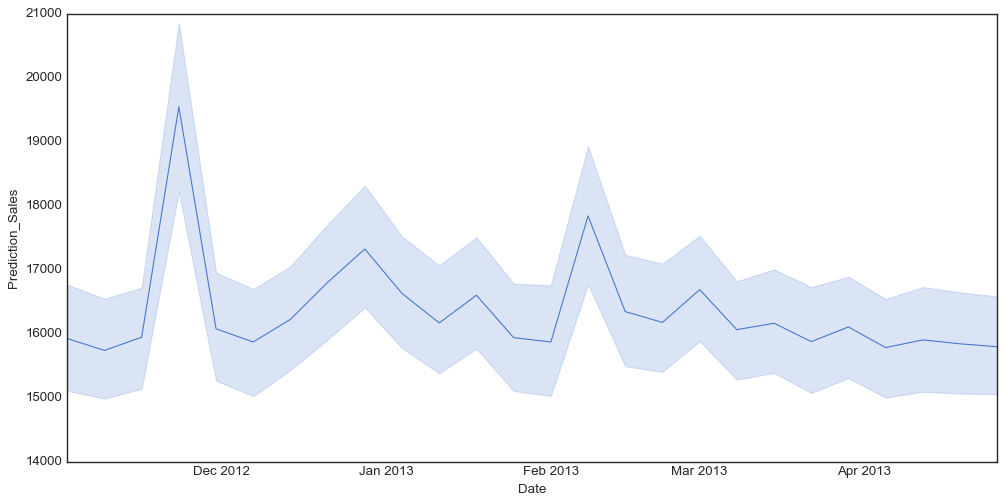

In [146]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df_test.Date, y = "Prediction_Sales", data = df_test);

# The Task

1.	Predict the department-wide sales for each store for the following year
2.	Model the effects of markdowns on holiday weeks
3.	Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


## Answers :-

1.	Predict the department-wide sales for each store for the following year


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dept', ylabel='Prediction_Sales'>

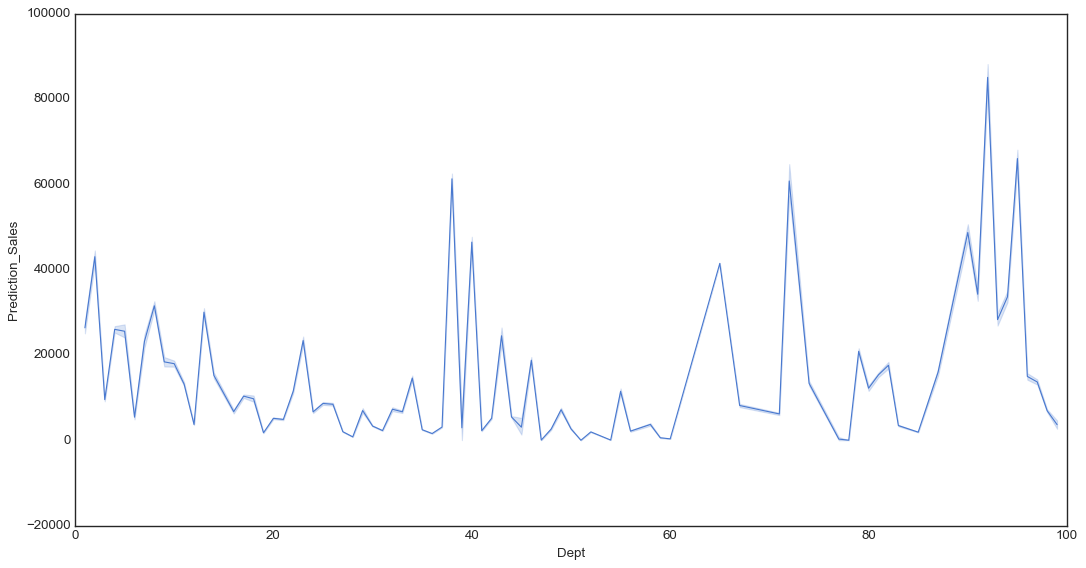

In [153]:
plt.figure(figsize=(16,8))
sns.lineplot('Dept','Prediction_Sales',data=df_test)

2.	Model the effects of markdowns on holiday weeks


In [154]:
features=pd.read_csv("Features data set.csv")
train=pd.read_csv("sales data-set.csv")
stores=pd.read_csv("stores data-set.csv")
test=pd.read_csv("test.csv")

In [155]:
df = pd.merge(train, features, how = "left")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [156]:
df = pd.merge(df, stores, how = "left")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [157]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

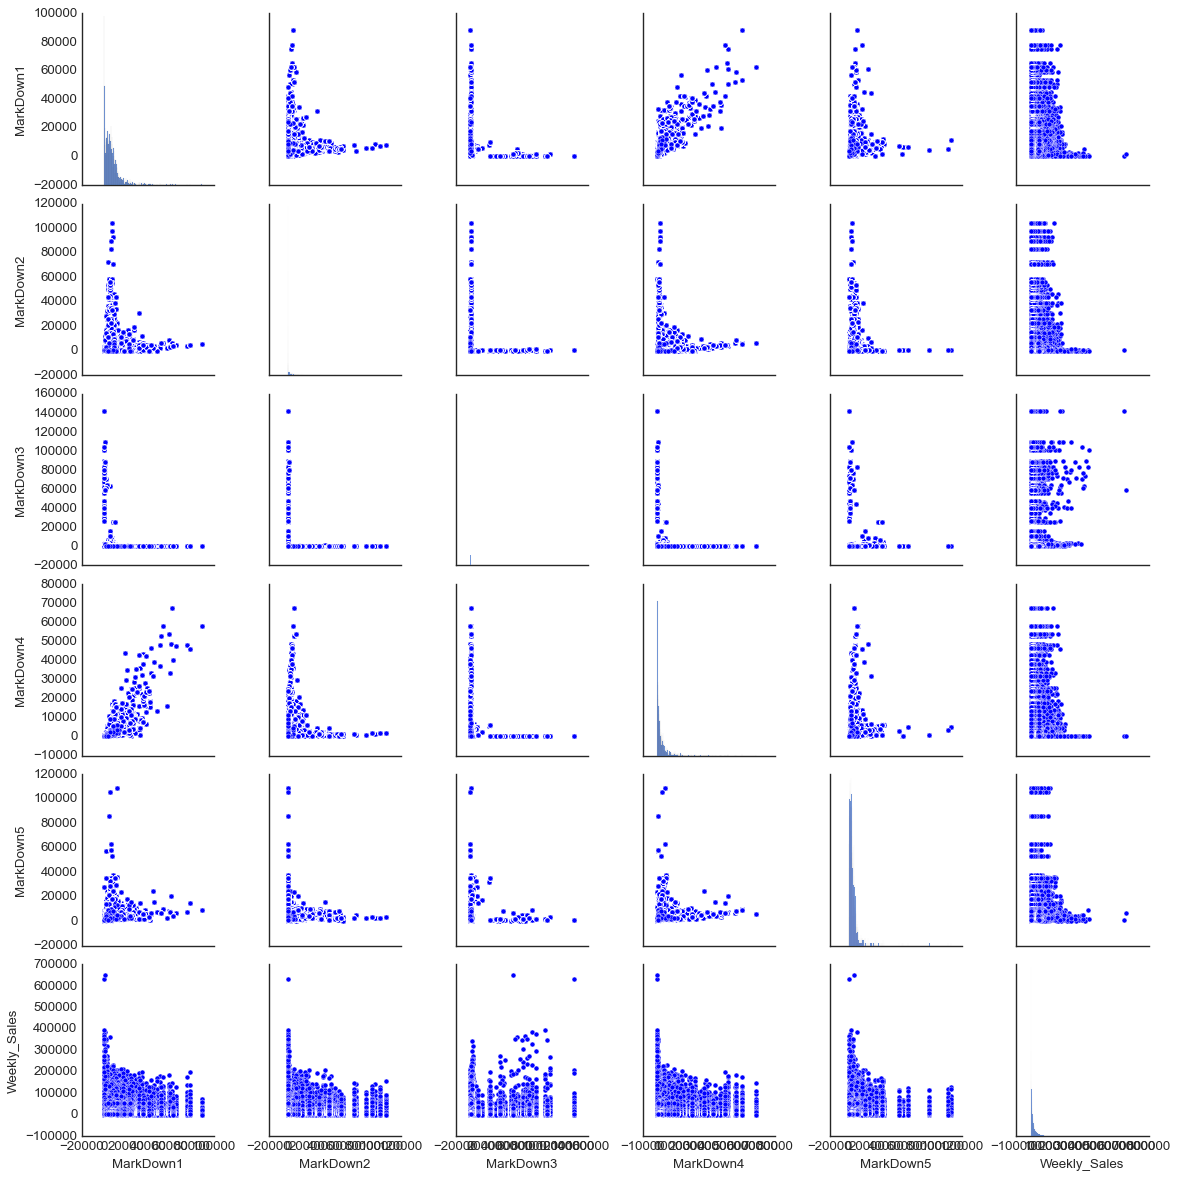

In [159]:
sns.pairplot(vars=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales'],data=df)

so, from these graph From this graph, it is clear to us that there is no significant effect of markdown on weekly sales.

That's why we dropped the markdown from your model

3.Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

Weekly sales is mostly depends on IsHoliday, Temperature, Fuel_Price, CPI

Also It is mostly depends on size of the stores
 
According to my observation sales are increases dramaticaly on year ends. Christmas and thanks giving affect those values directly  
